In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import os
import subprocess
import cv2 
from PIL import Image 

#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/FDM_n_Bodies"
import sys
sys.path.insert(1, My_Package_PATH)
import OneD.FDM as FDM
import OneD.NBody as NB
import OneD.Global as GF



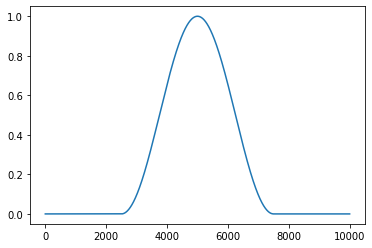

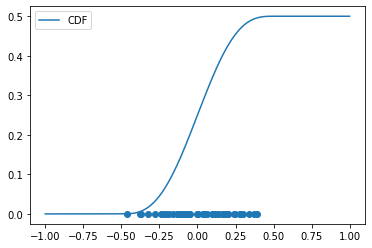

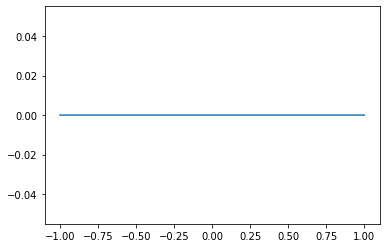

In [2]:
N=10**4
L=2
z = np.linspace(-L/2,L/2,N)

L_s=1
v_s=1

Num_bosons=0
Num_stars=100
sigma = 1/Num_stars
stars,chi = GF.sine2_ICs(z,L,Num_bosons,sigma,Num_stars,v_s,L_s)
plt.scatter([star.x for star in stars],np.zeros_like(stars))
plt.legend()
plt.show()
plt.plot(z,chi)

# Testing delta function (point source)


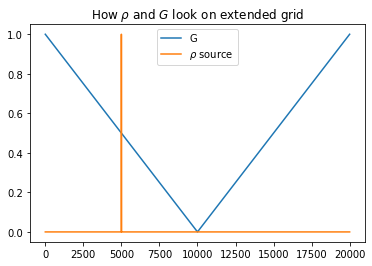

ValueError: operands could not be broadcast together with shapes (20000,) (19999,) 

In [3]:
N=10**4
rho = np.zeros(N)
rho[N//2]+=1
#rho[N//2+100]+=1


L=2
x = np.linspace(0,L,N)
G = 0.5*x
G = np.append(G[::-1],G)
plt.plot(G, label = "G")
plt.plot(np.append(rho,np.zeros_like(rho)), label = "$\\rho$ source")
plt.title("How $\\rho$ and $G$ look on extended grid")
plt.legend()
plt.show()

G_tilde = np.fft.fft(G)
phi = GF.fourier_potential(rho,L,type = 'Isolated', G_tilde = G_tilde)
plt.plot(x,rho, label = "$\\rho$ source")
plt.plot(x,phi, label = "$\\phi$ solution")
plt.legend()
plt.show()

# Testing the Analytic Box vs Sampled Box


---------ANALYTIC BOX---------
Isolated BCs: f_net = 3.505967446184705e-16
Periodic BCs: f_net = -4.674623261579606e-17


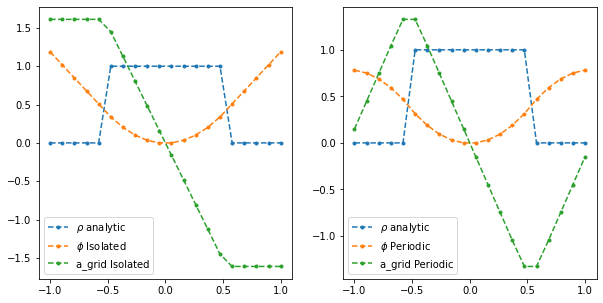

----------RANDOM SAMPLE----------
Isolated BCs: f_net = 6.427606984671958e-16
Periodic BCs: f_net = 2.337311630789803e-17


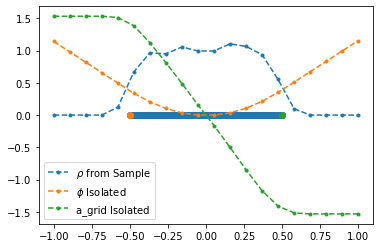

In [9]:
#Set up the grid:
N=2*10**1
L=2
z = np.linspace(-L/2,L/2,N)
dz = z[1]-z[0]

###########################
# ANALYTIC BOX ############
#Set up density:
rho = np.zeros(N)
rho[np.abs(z)<L/4]=1

#Setup the Green's function:
z_long = np.linspace(-L,L,2*N-1)
G = 0.5*np.abs(z_long)
G_tilde = np.fft.fft(G)
#re-set z_long for the plots
z_long = np.linspace(-L/2,3*L/2,2*N-1) 

#NOW SOLVING ANALYTIC BOX:
#Isolated BCs:
phi_Iso = GF.fourier_potential(rho,L,type = 'Isolated', G_tilde = G_tilde)
a_grid_Iso = -GF.gradient(phi_Iso,L,type='Isolated')

#Periodic BCs:
phi_periodic = GF.Periodic_Poisson(rho,L)
a_grid_periodic = -GF.gradient(phi_periodic,L)

#Calculate NET FORCE:
print("---------ANALYTIC BOX---------")
f_net = np.sum(a_grid_Iso*rho)*dz #Isolated
print(f"Isolated BCs: f_net = {f_net}")
f_net = np.sum(a_grid_periodic*rho)*dz #Periodic
print(f"Periodic BCs: f_net = {f_net}") 

#Plot solution:
fig,ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(z,rho, ".--", label="$\\rho$ analytic")
ax[0].plot(z,phi_Iso, ".--", label = "$\\phi$ Isolated")
ax[0].plot(z,a_grid_Iso, ".--", label = "a_grid Isolated")
ax[0].legend()

ax[1].plot(z,rho, ".--", label="$\\rho$ analytic")
ax[1].plot(z,phi_periodic,".--", label = "$\\phi$ Periodic")
ax[1].plot(z,a_grid_periodic, ".--", label = "a_grid Periodic")
ax[1].legend()
plt.show()

#ANALYTIC SOLUTION
# a = 0.5
# #Domain(s) for analytic solution:
# x_1 = np.linspace(-a,a,499)
# x_2 = np.linspace(a,L/2,250)
# x_3 = np.linspace(-L/2,-a,250)
# x_full = np.append(x_3,np.append(x_1,x_2))
# #Outputs on domains:
# analytic_1 = 2*np.pi*(x_1)**2
# analytic_2 = 2*np.pi*a*(2*x_2-a)
# analytic_3 = -2*np.pi*a*(2*x_3+a)
# analytic = np.append(analytic_3,np.append(analytic_1,analytic_2))
# plt.plot(x_full,analytic)

##################################
# RANDOM SAMPLE ##################

Num_stars = 10**3
stars_x = (L/2)*np.random.random_sample(size=(Num_stars,))-L/4
stars = [NB.star(0,1,x,0) for x in stars_x]
grid_counts = NB.grid_count(stars,L,z)
sigma = 1/Num_stars
rho_part = (grid_counts/dz)*sigma #this is actually like chi x chi*
phi_part = GF.Isolated_Poisson(rho_part,L,G_tilde)
a_grid_2 = -GF.gradient(phi_part,L,type='Isolated')

plt.scatter(stars_x,np.zeros_like(stars_x))
plt.scatter(np.min(stars_x),0)
plt.scatter(np.max(stars_x),0)
eps = 0.01
plt.plot(z,rho_part, ".--", label = "$\\rho$ from Sample")
#plt.xlim(L/4-eps,L/4+eps)
#plt.ylim(-2,2)
plt.plot(z,phi_part, ".--", label = "$\\phi$ Isolated")
plt.plot(z,a_grid_2, ".--", label = "a_grid Isolated")
#plt.xlim(-L/2-eps,L/2+eps)
#plt.ylim(-eps,1.5+eps)
plt.legend()
plt.plot()

#Calculate NET FORCE:
print("----------RANDOM SAMPLE----------")
f_net = np.sum(a_grid_2*rho_part)*dz
print(f"Isolated BCs: f_net = {f_net}")
f_net = np.sum(-GF.gradient(rho_part,L,'Periodic')*rho_part)*dz
print(f"Periodic BCs: f_net = {f_net}")


6.3139274708624885e-06


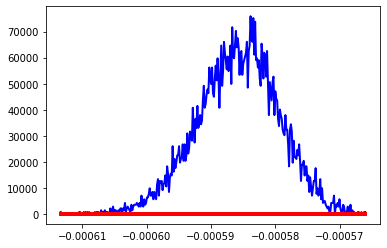

In [34]:
# MONTE CARLO THE RANDOM SAMPLED BOX:
Nsample = 10**4
Num_stars = 10**3
Sample_space = np.zeros(Nsample)
for i in range(Nsample):
    #Set up distribution:
    stars_x = (L/2)*np.random.random_sample(size=(Num_stars,))-L/4
    stars = [NB.star(0,1,x,0) for x in stars_x]
    grid_counts = NB.grid_count(stars,L,z)
    sigma = 1/Num_stars
    rho_part = (grid_counts/dz)*sigma #this is actually like chi x chi*
    
    #Calculate phi and a_grid:
    phi_part = GF.Isolated_Poisson(rho_part,L,G_tilde)
    a_grid_2 = -GF.gradient(phi_part,L,type='Isolated')
    
    #Calculate Force:
    f_net = np.sum(a_grid_2*rho_part)*dz
    f_mean = f_net/Num_stars
    Sample_space[i] = f_mean #record

Fhist,Fedges = np.histogram(Sample_space, bins = int(Nsample/30),density = True)
Fcen = 0.5*(Fedges[:-1] + Fedges[1:])
plt.plot(Fcen,Fhist,c='blue',lw=2)
std = Sample_space.std()
gaussfit = np.exp(-Fcen**2/2./std**2)/np.sqrt(2*np.pi)/std
plt.plot(Fcen,gaussfit,c='red',lw=4)
print (std)

# Testing code from Package on point source: 


Choose a (non-dimensional) box length:

Choose percentage (as a decimal) of FDM (by mass)
Fraction of Particles (by mass) = 1.0


How many particles?
Num_stars = 1
sigma = 1.0
Num_Bosons = 0.0
mu = 1


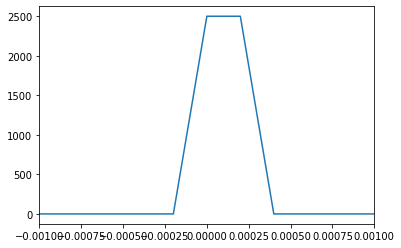

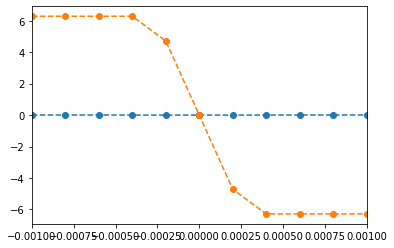

Star position = 0
Acceleration on star via my code:
-2.594974162522948e-09
Closest index position (div(z/dz)):
j=5000
acceleration @ j = -0.0
remainder = 1.1013412404281553e-13
Accounting for remainder via interpolation:
a=-2.594974162522948e-09
Notice the added portion (for interpolation) is large:
rem*(a_grid[j+1]-a_grid[j])/dz=-2.594974162522948e-09


In [113]:
L_s = 1 #kpc
v_s = 1 #100km/s
G = 1
hbar = 1
T = L_s/v_s
M_s = L_s*v_s**2

L, mu, Num_bosons, r, lambda_deB, R, sigma, Num_stars = GF.StartupV2(hbar, L_s, v_s)
m = mu*M_s
percent_FDM = Num_bosons * mu / (Num_bosons * mu + Num_stars * sigma)

#Set up Grid
L = L*L_s #new length. Length of the box
N = 10**4+1 #number of grid points
z = np.linspace(-L/2,L/2,N)
dz = z[1]-z[0]

stars = [NB.star(0,sigma,0,0)]
grid_counts = NB.grid_count(stars,L,z)
rho_part = (grid_counts/dz)*sigma #this is actually like chi x chi*
plt.plot(z,rho_part)
#plt.plot([z[N//2],z[N//2]],[0,rho_part[N//2]])
#plt.plot([z[N//2+1],z[N//2+1]],[0,rho_part[N//2+1]])
plt.xlim(-0.001,0.001)
plt.show()
G = z/2
G = np.append(G[::-1],G)
G_tilde = np.fft.rfft(G)
phi = GF.Isolated_Poisson(rho_part,L,G_tilde)
#phi = GF.Periodic_Poisson(rho_part,L)

a_grid = -GF.gradient(phi,L,type='Isolated')

plt.plot(z,phi,"o--")
plt.plot(z,a_grid,"o--")
plt.scatter(stars[0].x,0,c="r")
#plt.plot(z,rho_part)
plt.xlim(-0.001,0.001)
plt.show()

#print(a_grid[25])
print("=========")

g=NB.accel_funct(a_grid,L,dz)
print(f"Star position = {stars[0].x}")
print("Acceleration on star via my code:")
print(g(stars[0].x))

j=int((stars[0].x+L/2)//dz)
print("Closest index position (div(z/dz)):")
print(f"j={j}")
print(f"acceleration @ j = {a_grid[j]}")

rem = (stars[0].x+L/2) % dz
print(f"remainder = {rem}") 
print("Accounting for remainder via interpolation:")
value = a_grid[j] + rem*(a_grid[j+1]-a_grid[j])/dz
print(f"a={value}")

print("Notice the added portion (for interpolation) is large:")
print(f"rem*(a_grid[j+1]-a_grid[j])/dz={rem*(a_grid[j+1]-a_grid[j])/dz}")
#g = NB.accel_funct(a_grid,L,dz)

1.2566370614400246 -1.2566370614400246


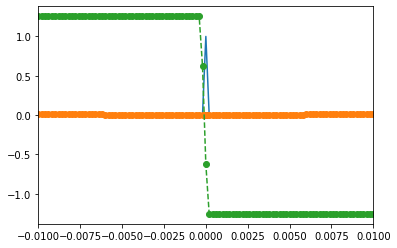

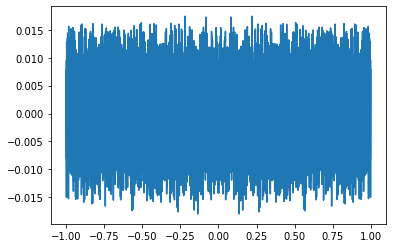

In [20]:
L_s = 1 #kpc
v_s = 1 #100km/s
G = 1
hbar = 1
T = L_s/v_s
M_s = L_s*v_s**2

L = 2
mu = 10**3
#L, mu, Num_bosons, r, lambda_deB, R, sigma, Num_stars = GF.StartupV2(hbar, L_s, v_s)
#m = mu*M_s
#percent_FDM = Num_bosons * mu / (Num_bosons * mu + Num_stars * sigma)

#Set up Grid
L = L*L_s #n01ew length. Length of the box
N = 10**4+1 #number of grid points
z = np.linspace(-L/2,L/2,N)
dz = z[1]-z[0]

chi = np.zeros_like(z)
chi[N//2] = 1

rho_FDM = mu*np.absolute(chi)**2 #just norm-squared of wavefunction
psi = chi* L**(-3/2)

# stars = [NB.star(0,sigma,0,0)]
# grid_counts = NB.grid_count(stars,L,z)
# rho_part = (grid_counts/dz)*sigma #this is actually like chi x chi*
    
G = z/2
G = np.append(G[::-1],G)
G_tilde = np.fft.rfft(G)
phi = GF.Isolated_Poisson(rho_FDM,L,G_tilde)

a_grid = -GF.gradient(phi,L,type='Isolated')
print(np.max(a_grid),np.min(a_grid))

plt.plot(z,chi)
plt.plot(z,phi,"o--")
plt.plot(z,a_grid,"o--")
plt.scatter(stars[0].x,0,c="r")
plt.xlim(-0.01,0.01)
plt.show()

dtau = 0.1
r=10
chi = FDM.kick(chi,phi/2,r,dtau/2)
chi = FDM.drift(chi,r/2,dz,dtau)
phi = GF.Isolated_Poisson(rho_FDM,L,G_tilde)
chi = FDM.kick(chi,phi/2,r,dtau/2)
plt.plot(z,chi)